# Yubo test : recommendations

We're given two files: \
    \- tag_names.csv : correspondances between tag_ids and tags \
    \- user_tag.csv: relationships between users and tags\


Objective: \
1/ Find all tags similar to "minecraft" \
2/ Build a system to recommend tags to users

# Part 1 : Exploration of data

In [1]:
# import package for exploration
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# system import
import os
import numpy as np

#fix random seed for reproductibility
np.random.seed(42)

In [2]:
df_tag_names = pd.read_csv(os.path.join(os.getcwd(),"tag_reco_test", "tag_names.csv"), sep = "\t")
df_user_tag = pd.read_csv(os.path.join(os.getcwd(),"tag_reco_test", "user_tag.csv"), sep = "\t")

In [3]:
df_tag_names.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 107175 entries, 0 to 107174
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   tag_id    107175 non-null  object
 1   tag_name  107175 non-null  object
dtypes: object(2)
memory usage: 1.6+ MB


In [4]:
df_tag_names.head()

,tag_id,tag_name
0,8a833138,Koneko no Studio
1,6cec747d,Need For Speed Underground Rivals
2,e217f527,Kore ga UFO da! Soratobu Enban
3,9a69d8c6,Shinobu Kokoro wa
4,b874034a,Ano Hito to Nitenai Kuchibiru


In [5]:
df_user_tag.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000000 entries, 0 to 1999999
Data columns (total 2 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   uid     object
 1   tag_id  object
dtypes: object(2)
memory usage: 30.5+ MB


This first table link tag to tag_name, tag_id is a hash and the tag_name is some texte

In [6]:
df_user_tag.head()

,uid,tag_id
0,5b834695,981f0e1f
1,ec16a4d6,e7216648
2,dca48ac2,5cc98ce2
3,8360babd,d4de315c
4,19291034,31ca6ec6


In [7]:
df_user_tag.uid.nunique()

1039548

In [8]:
df_user_tag.tag_id.nunique()

22006

This second table is a link table between user id 'uid' and the tags 'tag_id'. I just check the link drive and it seems there is no other data.  I will use this table for recommendation system later.

# explore tags

In [7]:
df_tag_names.sample(50)

,tag_id,tag_name
46004,a689bffd,A Night Out
94138,7b0493c6,FRAD
99062,57e9cd6f,Maceo Parker
91933,6da94562,Sure Sure
97169,3d70f830,Prefab Sprout
90603,40fe60b7,Conkarah
91653,e7487120,Mory Kanté
94235,22e4cd31,Them Are Us Too
71983,cd73e421,Electrick Children
33942,8d02ab43,Spawn of Possession


Most data in tag seems to be music group, movies title, manga,... my first idea about create an embedding with doc2vec or BERT seems compromised...or extract feature from this text is irrelevant at first sight.

So, now, let's have a look on how the tags are distributed over user. First, let's count the occurence of each tag.

In [8]:
df_grouped_user_tag = df_user_tag.groupby("tag_id").count().reset_index().rename(columns={"uid": "count"})

Here are the most frequent tags. It seems consistent.

In [9]:
df_grouped_user_tag.sort_values(by=['count'], ascending=False).head(10).merge(df_tag_names, on='tag_id')

,tag_id,count,tag_name
0,5f790ce7,17482,English
1,d07dc11f,15315,Grand Theft Auto V
2,88eb7e0f,12159,Stranger Things
3,915249a0,11741,Basketball
4,82946c4d,11621,Football
5,c3c1b983,11314,Rick and Morty
6,e2e2bbb4,11026,Eminem
7,981f0e1f,9954,Drake
8,535cb1e8,9814,Queen
9,2d602f81,9766,Nirvana


<AxesSubplot:ylabel='Density'>

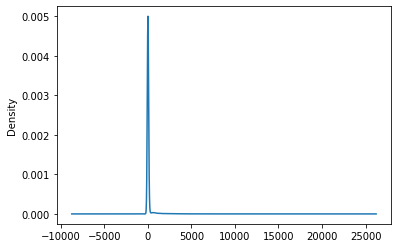

In [10]:
df_grouped_user_tag["count"].plot.kde()

Let's have a look under and over 50 to get a better idea

In [11]:
df_count_over_50 = df_grouped_user_tag.loc[df_grouped_user_tag["count"]>=50]

In [12]:
len(df_count_over_50)/len(df_grouped_user_tag)

0.10751613196400982

10% of tags appears less than 50 times. We may think we have few informations from users for 90% of tags. Distribution is far from being uniform

In [13]:
df_count_50 = df_grouped_user_tag.loc[df_grouped_user_tag["count"]<50]

<AxesSubplot:xlabel='count', ylabel='Count'>

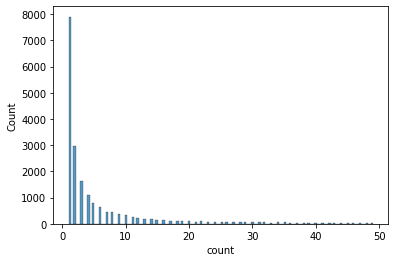

In [14]:
sns.histplot(data=df_count_50, x="count")

When we have a look to tags that appears less than 50 times, we can see there is a lot of singular tags.

# Part 2 : find all tags similar to Minecraft

First thing to do from my point of view is to check with regex what I got.

In [15]:
import re

In [16]:
c=re.compile(r"\bminecraft\b",re.I)
df_reco_regex = df_tag_names[df_tag_names["tag_name"].apply(lambda x:len(c.findall(x))>0)]
list_tag_ids_minecraft = df_reco_regex["tag_id"].tolist()
df_reco_regex

,tag_id,tag_name
34443,0f681579,Minecraft: Story Mode - Season Two
36023,9743d409,Minecraft
38809,f993c2df,Minecraft: Story Mode - A Telltale Games Series
41363,8ab98581,Minecraft: Dungeons
45471,3d77f200,Minecraft: Pocket Edition
51178,68d404ed,Minecraft Epic


Ok, right now, I think I will use collaborative filtering which is the usual thing to do to find tag with similarities. For rating, I will put one value in the matrix for tag_id/uid matching and 0 otherwise. I will use SVD decomposition and store matrices in sparse format for memory issues

In [17]:
import numpy as np
from scipy import sparse

In [18]:
ar = np.array(df_user_tag.to_records(index=False))

In [19]:
rows, r_pos = np.unique(ar['tag_id'], return_inverse=True)
cols, c_pos = np.unique(ar['uid'], return_inverse=True)
s = sparse.coo_matrix((np.ones(r_pos.shape,int), (r_pos, c_pos)))
sparse_csr_mat = s.tocsr().asfptype()


In [20]:
from scipy.sparse.linalg import svds
tags_mat, eigenvalues, users_mat = svds(sparse_csr_mat, k=80)

In [21]:
index_minecraft = np.where(rows == "9743d409")[0][0]

I chose to use cosine similarity

In [22]:
from numpy.linalg import norm
from numpy import dot

p1 = tags_mat.dot(tags_mat[index_minecraft])
n1 = norm(tags_mat[index_minecraft])
n2 = norm(tags_mat, axis=1)
p3 = p1/(n2*n1)

In [23]:
top_ten = np.argsort(p3)[-10:]

In [24]:
for ind in top_ten:
    print(df_tag_names[df_tag_names.tag_id == rows[ind]].values)

[['1bf3f035' 'Appleseed Ex Machina']]
[['1f3ead8e' 'Mobile Suit Gundam SEED']]
[['347406ff' 'Titan A.E.']]
[['9346d8a0' 'Stan Getz']]
[['f918d2e8' 'The Legend of Heroes: Trails in the Sky SC']]
[['4d023850' 'Kino']]
[['1939d50a' 'Warhammer: Vermintide 2']]
[['091b635b' 'Blind Channel']]
[['00b9ba19' 'Sonic 3 and Knuckles']]
[['9743d409' 'Minecraft']]


Recommendation done by SVD decomposition seems to give other games. Due to memory issues, I couldn't get more eigenvalues. Is it better than regex defined earlier? It depends of what we want to do.

In [25]:
df_grouped_user_tag[df_grouped_user_tag["tag_id"].isin(list_tag_ids_minecraft)]

,tag_id,count
1372,0f681579,18
5273,3d77f200,151
9034,68d404ed,3
11963,8ab98581,31
13041,9743d409,9243
21489,f993c2df,28


It seems understandable I do not get recommendation with matrix factorization same as regex. Regex reco have tags underrepresented. I should also check for normalization of the matrix if I want to go futher.

# filtered rating

I will filter with a cutoff of 50 to get a better representation.

In [26]:
filtered_90quantile_tag_ids = df_count_over_50.tag_id.tolist()
df_user_tag_filtered = df_user_tag[df_user_tag.tag_id.isin(filtered_90quantile_tag_ids)].copy()

In [27]:
ar = np.array(df_user_tag_filtered.to_records(index=False))
rows, r_pos = np.unique(ar['tag_id'], return_inverse=True)
cols, c_pos = np.unique(ar['uid'], return_inverse=True)
s = sparse.coo_matrix((np.ones(r_pos.shape,int), (r_pos, c_pos)))
sparse_csr_mat = s.tocsr().asfptype()

In [28]:
tags_mat, eigenvalues, users_mat = svds(sparse_csr_mat, k=80)
index_minecraft = np.where(rows == "9743d409")[0][0]
p1 = tags_mat.dot(tags_mat[index_minecraft])
n1 = norm(tags_mat[index_minecraft])
n2 = norm(tags_mat, axis=1)
p3 = p1/(n2*n1)
top_ten = np.argsort(p3)[-10:]

In [29]:
for ind in top_ten:
    print(df_tag_names[df_tag_names.tag_id == rows[ind]].values)

[['2b3e4920' 'The Mask']]
[['c4c9c371' 'Hereditary']]
[['accd2561' 'My Little Pony: Friendship Is Magic']]
[['7bd455c4' 'Waterparks']]
[['86133833' 'Big Time Rush']]
[['db223d9a' 'Car Seat Headrest']]
[['b9f98f48' 'Wilbur']]
[['9b590096' 'Danganronpa V3: Killing Harmony']]
[['c9296261' 'Lany']]
[['9743d409' 'Minecraft']]


With this filtered version, we got a more mainstream recommendation which seems normal. Other thing I could check is normalization of the matrix with number of occurences of a tag.

In [30]:
from scipy.sparse.linalg import spsolve
# get an implementation of ALS on the net
def implicit_als(sparse_data, alpha_val=40, iterations=10, lambda_val=0.1, features=10):
 
    """ Implementation of Alternating Least Squares with implicit data. We iteratively
    compute the user (x_u) and item (y_i) vectors using the following formulas:
 
    x_u = ((Y.T*Y + Y.T*(Cu - I) * Y) + lambda*I)^-1 * (X.T * Cu * p(u))
    y_i = ((X.T*X + X.T*(Ci - I) * X) + lambda*I)^-1 * (Y.T * Ci * p(i))
 
    Args:
        sparse_data (csr_matrix): Our sparse user-by-item matrix
 
        alpha_val (int): The rate in which we'll increase our confidence
        in a preference with more interactions.
 
        iterations (int): How many times we alternate between fixing and 
        updating our user and item vectors
 
        lambda_val (float): Regularization value
 
        features (int): How many latent features we want to compute.
    
    Returns:     
        X (csr_matrix): user vectors of size users-by-features
        
        Y (csr_matrix): item vectors of size items-by-features
     """

    # Calculate the foncidence for each value in our data
    confidence = sparse_data * alpha_val
    
    # Get the size of user rows and item columns
    user_size, item_size = sparse_data.shape
    
    # We create the user vectors X of size users-by-features, the item vectors
    # Y of size items-by-features and randomly assign the values.
    X = sparse.csr_matrix(np.random.normal(size = (user_size, features)))
    Y = sparse.csr_matrix(np.random.normal(size = (item_size, features)))
    
    #Precompute I and lambda * I
    X_I = sparse.eye(user_size)
    Y_I = sparse.eye(item_size)
    
    I = sparse.eye(features)
    lI = lambda_val * I
     # Start main loop. For each iteration we first compute X and then Y
    for i in range(iterations):
        print('iteration %d of %d' % (i+1, iterations))
        
        # Precompute Y-transpose-Y and X-transpose-X
        yTy = Y.T.dot(Y)
        xTx = X.T.dot(X)

        # Loop through all users
        for u in range(user_size):

            # Get the user row.
            u_row = confidence[u,:].toarray() 

            # Calculate the binary preference p(u)
            p_u = u_row.copy()
            p_u[p_u != 0] = 1.0

            # Calculate Cu and Cu - I
            CuI = sparse.diags(u_row, [0])
            Cu = CuI + Y_I

            # Put it all together and compute the final formula
            yT_CuI_y = Y.T.dot(CuI).dot(Y)
            yT_Cu_pu = Y.T.dot(Cu).dot(p_u.T)
            X[u] = spsolve(yTy + yT_CuI_y + lI, yT_Cu_pu)

    
        for i in range(item_size):

            # Get the item column and transpose it.
            i_row = confidence[:,i].T.toarray()

            # Calculate the binary preference p(i)
            p_i = i_row.copy()
            p_i[p_i != 0] = 1.0

            # Calculate Ci and Ci - I
            CiI = sparse.diags(i_row, [0])
            Ci = CiI + X_I

            # Put it all together and compute the final formula
            xT_CiI_x = X.T.dot(CiI).dot(X)
            xT_Ci_pi = X.T.dot(Ci).dot(p_i.T)
            Y[i] = spsolve(xTx + xT_CiI_x + lI, xT_Ci_pi)

    return X, Y
    

In [31]:
#user_vecs, tags_vecs = implicit_als(sparse_csr_mat, iterations=20, features=20, alpha_val=40)

I abandon using ALS as it seems costly

# Part 3 : recommend tags to user

For this part, I will use 'surprise' package, which is dedicated to recommendation

In [32]:
from surprise import SVD
from surprise import Dataset
from surprise import Reader
from surprise.model_selection import cross_validate

In [33]:
df_user_tag_filtered

,uid,tag_id
0,5b834695,981f0e1f
2,dca48ac2,5cc98ce2
3,8360babd,d4de315c
4,19291034,31ca6ec6
5,e724f214,e43c087d
...,...,...
1999995,fcb4080b,90d84901
1999996,099e8bf4,d9ea8d2b
1999997,b4c3ec06,a92e0a32
1999998,15ba8410,bced222a


In [34]:
reader = Reader(rating_scale=(0,1))
df_user_tag_filtered["rating"] = 1.0
data = Dataset.load_from_df(df_user_tag_filtered[["uid", "tag_id", "rating"]], reader)

In [35]:
svd = SVD(verbose=True, n_epochs=10)
cross_validate(svd, data, measures=['RMSE', 'MAE'], cv=3, verbose=True)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.0145  0.0145  0.0145  0.0145  0.0000  
MAE (testset)     0.0044  0.0044  0.0044  0.0044  0.0000  
Fit time          24.28   25.37   25.12   24.93   0.47    
Test time         3.39    3.83    3.40    3.54    0.21    


{'test_rmse': array([0.01450996, 0.01450851, 0.01451214]),
 'test_mae': array([0.00439976, 0.00439853, 0.00440415]),
 'fit_time': (24.282350778579712, 25.37414240837097, 25.123907566070557),
 'test_time': (3.3946597576141357, 3.8345446586608887, 3.4012365341186523)}

In [36]:
trainset = data.build_full_trainset()
svd.fit(trainset)

Processing epoch 0
Processing epoch 1
Processing epoch 2
Processing epoch 3
Processing epoch 4
Processing epoch 5
Processing epoch 6
Processing epoch 7
Processing epoch 8
Processing epoch 9


In [37]:
def generate_recommendation(uid, model, list_tags, top_n=10):
    list_rating = []
    for tag in list_tags: 
        list_rating.append(model.predict(uid,tag).est)
    list_index =np.argsort(np.array(list_rating))[-top_n:]
    recommmended_tags = []
    for i in list_index:
        recommmended_tags.append(list_tags[i])
    return recommmended_tags    

In [38]:
generate_recommendation('5b834695', svd, filtered_90quantile_tag_ids)

['711beff9',
 '711b8d5c',
 '7119c95d',
 '70ec08aa',
 '701d5ffd',
 '701cf2f6',
 '6fc459e7',
 '6fa95a3c',
 '716416d7',
 'fff220ac']

# Prospects

Concerning rating matrix, I should go further and try normalization approach to avoid bias due to frequency over tags. I was thinking also to use information by normalizing row with log(1/count_tag). Regularization term over User and Tags matrix could help also which i did not use in the part 2 about finding similar tags to minecraft.

For User recommendation, I tried to use 'surprise' package but algorithms did not seem adapted for bechmarking large dataset as my memory went down. So, I decided to just use it with SVD which works. We could go further and test others algorithms MF approach such as ALS, NMF,... and tried k-NN also. I could also adapt surprise model for part 2 about finding similar tags to minecraft.

Also, for evaluation, I should use better metrics such as FCP (Fraction od Concordant Pairs). Here, it bug due maybe to the test split done. I did not investigate further.

Other point, concerning generate_recommendation function, I should also remove tags already setup by user.

Concerning part 2, I did some first implementation which should also be evaluate by CV.

And overall, an hyperoptimisation study for similarities score methods, model hyperparameters, computation of rating matrice,...

I focused mainly here on collaborative filtering approach as I intuited information in tag names are irrevelant from a first exploration. Otherwise, I was thinking in this case to implement prod2vec approach which seems difficult in the amount of time, and so explore what features I could extract from this text. Maybe, it exists somewhere a model that can classify this text in features such as movie, manga, game,... I could use as input.

